In [69]:
import pandas as pd

## Import Data

In [71]:
df = pd.read_csv("C:/Users/madb3/Downloads/FakeNewsNet.csv")
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
df["clean_text"] = df["title"].str.lower().str.replace(r'[^\w\s]', '', regex=True)
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(df["clean_text"])
words = vectorizer.get_feature_names_out()

In [74]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=words)
tfidf_df["real"] = df["real"]

In [75]:
real_tfidf = tfidf_df[tfidf_df["real"] == 1].drop(columns=["real"]).mean().sort_values(ascending=False)[:20]
fake_tfidf = tfidf_df[tfidf_df["real"] == 0].drop(columns=["real"]).mean().sort_values(ascending=False)[:20]

C:\Users\madb3\AppData\Local\Temp\ipykernel_14328\1863398441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fake_tfidf.values, y=fake_tfidf.index, palette="Reds_r")


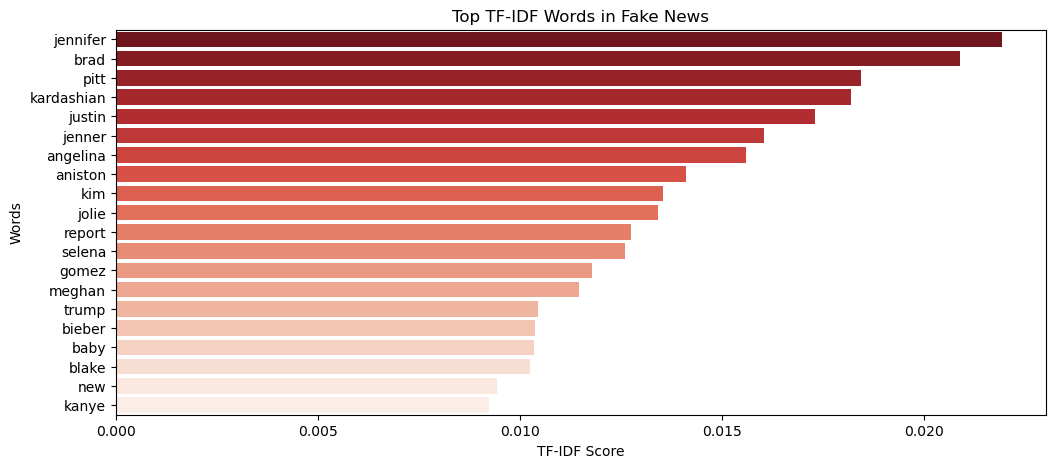

In [76]:
plt.figure(figsize=(12,5))
sns.barplot(x=fake_tfidf.values, y=fake_tfidf.index, palette="Reds_r")
plt.title("Top TF-IDF Words in Fake News")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()

C:\Users\madb3\AppData\Local\Temp\ipykernel_14328\2790436276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=real_tfidf.values, y=real_tfidf.index, palette="Blues_r")


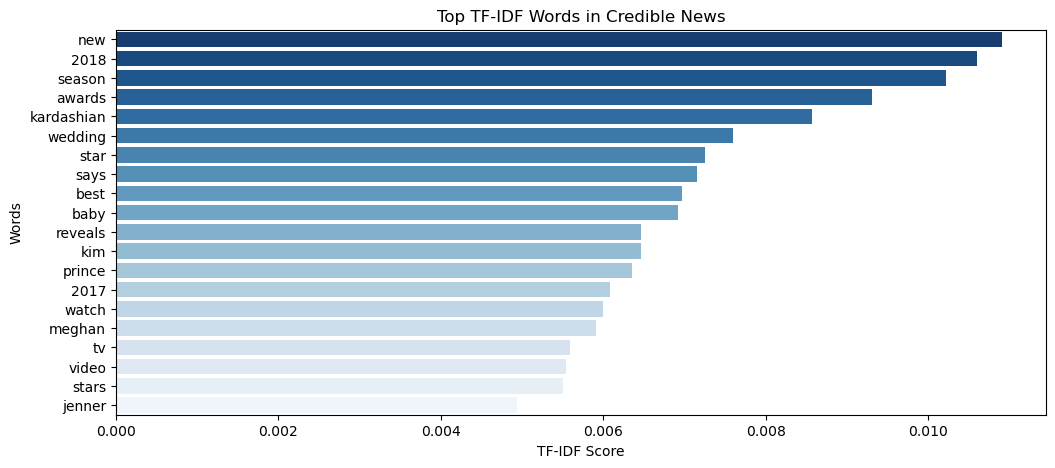

In [77]:
plt.figure(figsize=(12,5))
sns.barplot(x=real_tfidf.values, y=real_tfidf.index, palette="Blues_r")
plt.title("Top TF-IDF Words in Credible News")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()

In [78]:
real_websites = df[df["real"] == 1]["source_domain"].value_counts().head(20)
fake_websites = df[df["real"] == 0]["source_domain"].value_counts().head(20)

C:\Users\madb3\AppData\Local\Temp\ipykernel_14328\3854728074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fake_websites.values, y=fake_websites.index, palette="Reds_r")


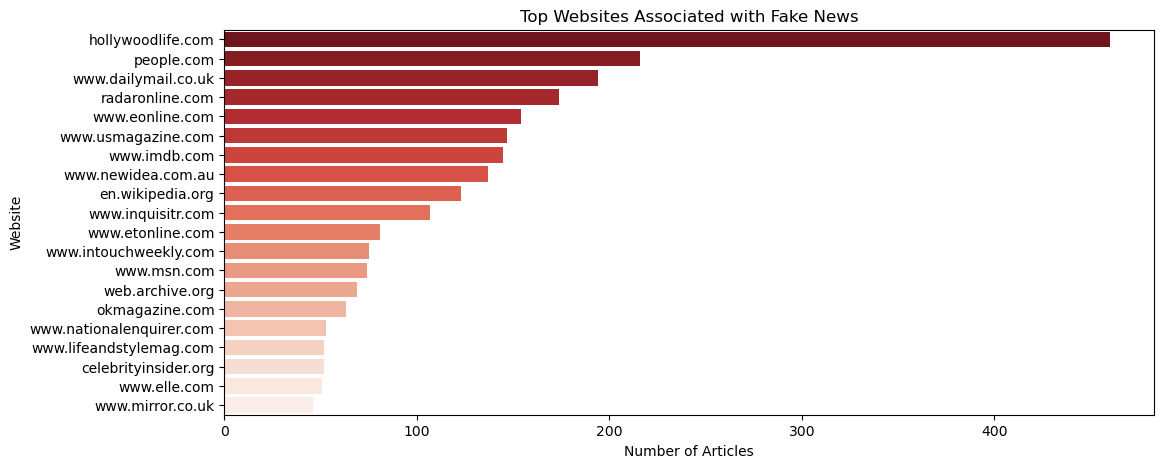

In [79]:
plt.figure(figsize=(12,5))
sns.barplot(x=fake_websites.values, y=fake_websites.index, palette="Reds_r")
plt.title("Top Websites Associated with Fake News")
plt.xlabel("Number of Articles")
plt.ylabel("Website")
plt.show()

C:\Users\madb3\AppData\Local\Temp\ipykernel_14328\1593961541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=real_websites.values, y=real_websites.index, palette="Blues_r")


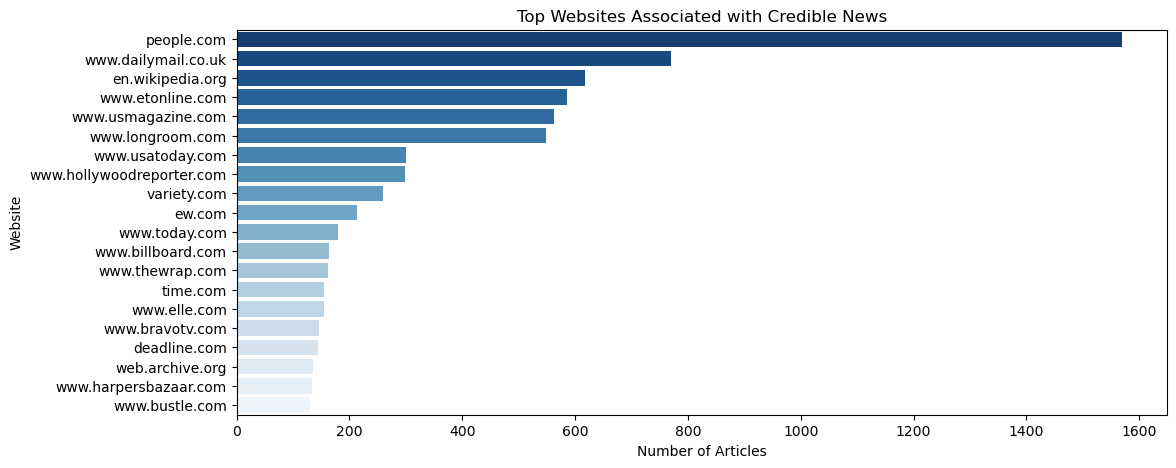

In [80]:
plt.figure(figsize=(12,5))
sns.barplot(x=real_websites.values, y=real_websites.index, palette="Blues_r")
plt.title("Top Websites Associated with Credible News")
plt.xlabel("Number of Articles")
plt.ylabel("Website")
plt.show()

### Convert text to numeric data

In [ ]:
X = vectorizer.fit_transform(df["title"])
y = df["real"]

## Modeling

### Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [130]:
y_prediction = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_prediction))
print("\nClassification Report:\n", classification_report(y_test, y_prediction))

Accuracy: 0.8316810344827587

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.53      0.61      1151
           1       0.86      0.93      0.89      3489

    accuracy                           0.83      4640
   macro avg       0.79      0.73      0.75      4640
weighted avg       0.82      0.83      0.82      4640



In [203]:
X = df["title"]
y = df["real"]

In [204]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [205]:
X_tfidf = vectorizer.fit_transform(X)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [202]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [212]:
y_prediction = rf.predict(X_test)

In [214]:
print("Accuracy:", accuracy_score(y_test, y_prediction))
print("\nClassification Report:\n", classification_report(y_test, y_prediction))

Accuracy: 0.8325431034482759

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.50      0.60      1151
           1       0.85      0.94      0.89      3489

    accuracy                           0.83      4640
   macro avg       0.79      0.72      0.75      4640
weighted avg       0.82      0.83      0.82      4640



In [216]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

In [218]:
X_text = df["title"]
X_domain = df[["source_domain"]]
y = df["real"]

In [220]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(X_text)

In [222]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_domain_encoded = encoder.fit_transform(X_domain)

In [224]:
X_combined = hstack([X_tfidf, X_domain_encoded])

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

In [228]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85625

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.57      0.66      1151
           1       0.87      0.95      0.91      3489

    accuracy                           0.86      4640
   macro avg       0.83      0.76      0.79      4640
weighted avg       0.85      0.86      0.85      4640

